<img src="https://webna.ir/wp-content/uploads/2018/08/%D9%85%DA%A9%D8%AA%D8%A8-%D8%AE%D9%88%D9%86%D9%87.png" width=50% />

<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project4 - Clustering</h3>
</div>

<img src = "https://miro.medium.com/max/5760/1*_SRbz8535-CxPzo6IL9pBA.png" width=80%>

## Importing the libraries

In [126]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

## Load and Prepare Data

In [127]:
df = pd.read_csv(r"C:\Users\Rayan\Downloads\Compressed\16267662280368328\Mini Project 4 - Clustering(Market Basket Analysis )\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## EDA

In [128]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
74,75,Male,59,54,47
42,43,Male,48,39,36
124,125,Female,23,70,29
197,198,Male,32,126,74
26,27,Female,45,28,32


In [129]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [130]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [132]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [133]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Data Preprocessing

In [134]:
X = df.iloc[:, [3, 4]].values

In [135]:
from sklearn.preprocessing import LabelEncoder
encode_datetime = LabelEncoder()
df['Gender'] = encode_datetime.fit_transform(df['Gender'])

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [136]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
df = StandardScaler().fit_transform(X)
df

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## Strorytelling - Visualization

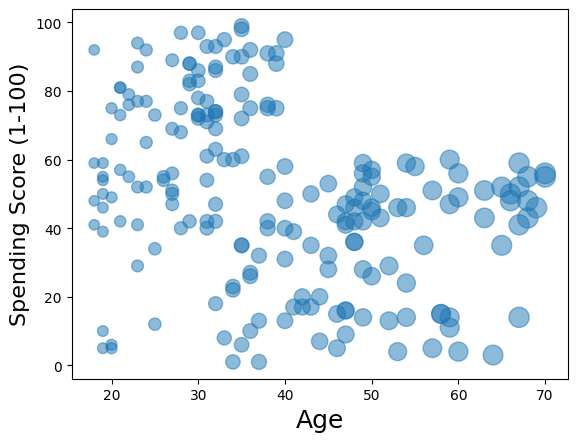

In [137]:
area = np.pi * ( X[:, 1]) 
plt.scatter(X[:, 1], X[:, 3], s=area, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()


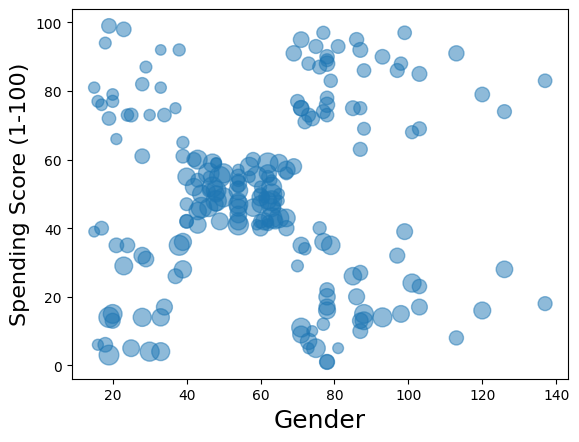

In [138]:
area = np.pi * ( X[:, 1]) 
plt.scatter(X[:, 2], X[:, 3], s=area, alpha=0.5)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

plt.show()


## Trani the Model (Clustering)

In [139]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [140]:
wcss

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75427.71182424153,
 58348.64136331505,
 51575.27793107792,
 44359.634641148325,
 40942.511170061174,
 37515.84125504126]

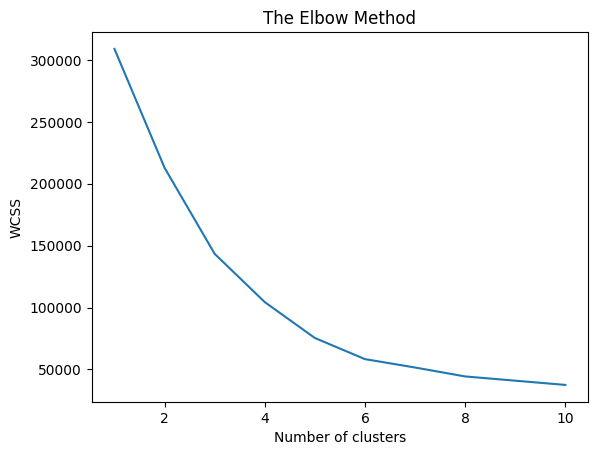

In [141]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [154]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [155]:
kmeans.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

## Send us the Result (Maktabkhoone)